# **Disciplina: DS-006**
**Aula: 001**

Topicos abordados:

* Introdução a Geovisualização
* Introdução ao geopandas
* Plot por estados do Brasil

In [1]:
"""
Biblioteca inical para manipulação de dados
"""
import pandas as pd

Dados relacionados a **Febre Amarela em humanos e primatas não-humanos - 1994 a 2023**

Dataset a ser utilizado foi obtido em: https://opendatasus.saude.gov.br/dataset/febre-amarela-em-humanos-e-primatas-nao-humanos

Descrição dos dataset: https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Febre+Amarela/Dicionario+de+variaveis.pdf

In [4]:
"""
Lendo o dataset
"""
url = 'https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Febre+Amarela/fa_casoshumanos_1994-2023.csv'
# TODO: Ler o arquivo csv utilizando a codificação ISO-8859-1 e o delimitador de
# dados como ";"
df = pd.read_csv(
    url,
    encoding="ISO-8859-1",
    delimiter=";",
)

TypeError: read_csv() got an unexpected keyword argument 'url'

**Conhecendo o dataset**

In [ ]:
"""
Descrição dos dataset: https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Febre+Amarela/Dicionario+de+variaveis.pdf
"""
df.head()

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
1,2,N,14,RR,140045.0,PACARAIMA,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO,NaN
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN,NaN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2768 non-null   int64  
 1   MACRORREG_LPI     2768 non-null   object 
 2   COD_UF_LPI        2768 non-null   int64  
 3   UF_LPI            2768 non-null   object 
 4   COD_MUN_LPI       2761 non-null   float64
 5   MUN_LPI           2762 non-null   object 
 6   SEXO              2767 non-null   object 
 7   IDADE             2766 non-null   object 
 8   DT_IS             2763 non-null   object 
 9   SE_IS             2752 non-null   float64
 10  MES_IS            2757 non-null   float64
 11  ANO_IS            2768 non-null   int64  
 12  MONITORAMENTO_IS  2768 non-null   object 
 13  OBITO             2768 non-null   object 
 14  DT_OBITO          979 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 324.5+ KB


In [ ]:
df.shape

(2768, 15)

In [ ]:
#Substituindo o NaN e valores vazios por 0 e removendo valores como string

# Replace NaN and empty values with 0
df["IDADE"] = df["IDADE"].fillna(0)
df["IDADE"] = df["IDADE"].replace('', 0)

# Removendo valores string e convertendo para inteiro
df["IDADE"] = pd.to_numeric(df["IDADE"], errors='coerce').fillna(0).astype(int)

In [ ]:
"""
Obtendo a média de idade dos casos
"""
# TODO: Obter a média das idades
df["IDADE"]

42.53901734104046

In [ ]:
# Ordenando o dataframe
df_ordenado = df.sort_values('UF_LPI')
df_ordenado.head()

# Conhecendo os códigos do municipios: https://www.ibge.gov.br/explica/codigos-dos-municipios.php

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
2735,2736,N,12,AC,120001.0,ACRELÂNDIA,M,16,30/01/2020,5.0,1.0,2020,2019/2020,SIM,10/02/2020
216,217,N,12,AC,120038.0,PLÁCIDO DE CASTRO,M,21,29/06/2000,26.0,6.0,2000,1999/2000,NÃO,NaN
336,337,N,13,AM,130440.0,URUCURITUBA,F,16,13/05/2003,20.0,5.0,2003,2001/2002,NÃO,NaN
28,29,N,13,AM,130353.0,PRESIDENTE FIGUEIREDO,F,17,28/02/1998,8.0,2.0,1998,1997/1998,NÃO,NaN
2727,2728,N,13,AM,130130.0,CODAJÁS,M,21,28/02/2019,9.0,2.0,2019,2018/2019,NÃO,NaN


In [ ]:
"""
Seleção de colunas para manipulação dos dados
Criando um novo data frame usando df_ordenado que contenha as colunas:
UF_LPI, MUN_LPI, SEXO, IDADE, ANO_IS, OBITO e redefinindo o index do data frame
"""

novo_df = df_ordenado[['UF_LPI', 'MUN_LPI', 'SEXO', 'IDADE', 'ANO_IS', 'OBITO']].reset_index(drop=True)
novo_df.head()


,UF_LPI,MUN_LPI,SEXO,IDADE,ANO_IS,OBITO
0,AC,ACRELÂNDIA,M,16,2020,SIM
1,AC,PLÁCIDO DE CASTRO,M,21,2000,NÃO
2,AM,URUCURITUBA,F,16,2003,NÃO
3,AM,PRESIDENTE FIGUEIREDO,F,17,1998,NÃO
4,AM,CODAJÁS,M,21,2019,NÃO


In [ ]:
# Conhecendo a biblioteca GEOBR: https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html
# Instalando geobr
!pip install geobr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.6
    Uninstalling shapely-2.0.6:
      Successfully uninstalled shapely-2.0.6
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4


In [ ]:
import geobr

In [ ]:
# Manipulação de graficos
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Obtendo os dados do estado de Roraima
state = geobr.read_state(code_state="RR")
state

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."


In [ ]:
# TODO: Obter os dados dos municipio de Roraima
muni = geobr.read_ ...

,code_muni,name_muni,code_state,abbrev_state,geometry
0,1400027.0,Amajari,14.0,RR,"MULTIPOLYGON (((-61.63676 4.23804, -61.63190 4..."
1,1400050.0,Alto Alegre,14.0,RR,"MULTIPOLYGON (((-63.83248 3.49277, -63.83052 3..."
2,1400100.0,Boa Vista,14.0,RR,"MULTIPOLYGON (((-60.59508 3.40097, -60.60109 3..."
3,1400159.0,Bonfim,14.0,RR,"MULTIPOLYGON (((-60.35269 2.69510, -60.35012 2..."
4,1400175.0,Cantá,14.0,RR,"MULTIPOLYGON (((-60.83735 2.34765, -60.83579 2..."
5,1400209.0,Caracaraí,14.0,RR,"MULTIPOLYGON (((-61.90504 1.92360, -61.89646 1..."
6,1400233.0,Caroebe,14.0,RR,"MULTIPOLYGON (((-59.74140 1.09545, -59.75278 1..."
7,1400282.0,Iracema,14.0,RR,"MULTIPOLYGON (((-63.82465 2.52919, -63.73623 2..."
8,1400308.0,Mucajaí,14.0,RR,"MULTIPOLYGON (((-61.97079 2.68713, -61.95941 2..."
9,1400407.0,Normandia,14.0,RR,"MULTIPOLYGON (((-60.27320 4.16702, -60.26420 4..."


In [ ]:
# Convertendo para lower case a coluna MUN_LPI para padronizar a comparação

novo_df['MUN_LPI'] = novo_df['MUN_LPI'].str.lower() # converte a coluna MUN_LPI para lower case
novo_df['MUN_LPI']


,MUN_LPI
0,acrelândia
1,plácido de castro
2,urucurituba
3,presidente figueiredo
4,codajás
...,...
2763,almas
2764,campos lindos
2765,arraias
2766,campos lindos


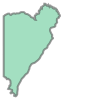

In [ ]:
# Renderizando o municipio de ???
muni['geometry'][2]

In [ ]:
# TODO: Obter o nome do municipio


'Boa Vista'

(-65.12217216952395, -58.5899659292567, -1.9232568160652506, 5.614464786450802)

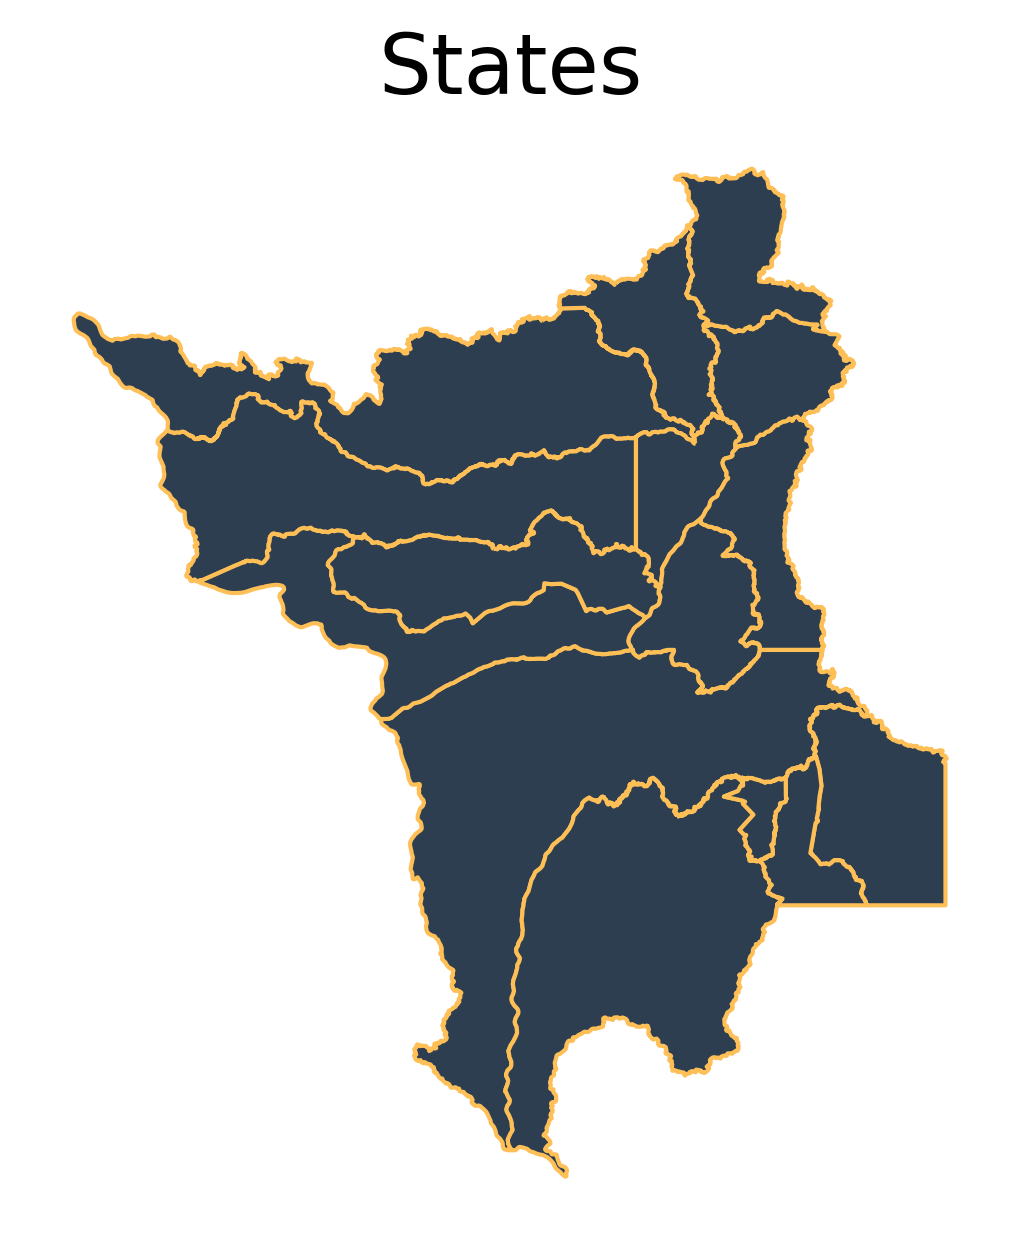

In [ ]:
# Plot todos os estados Brasileiros
fig, ax = plt.subplots(dpi=300)

muni.plot(
    facecolor="#2D3E50",
    edgecolor="#FEBF57",
    ax=ax)

ax.set_title("Estados", fontsize=20)
ax.axis("off")

In [ ]:
# Descrição do geodataframe
muni.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_muni     15 non-null     float64 
 1   name_muni     15 non-null     object  
 2   code_state    15 non-null     float64 
 3   abbrev_state  15 non-null     object  
 4   geometry      15 non-null     geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 728.0+ bytes


In [ ]:
# Descrição do Sistema de Georeferência
muni.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# TODO: Obter a area dos poligonos que representam os Estados


<ipython-input-24-06f3442c9a72>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  muni["area"] = muni.area


,code_muni,name_muni,code_state,abbrev_state,geometry,area
0,1400027.0,Amajari,14.0,RR,"MULTIPOLYGON (((-61.63676 4.23804, -61.63190 4...",2.317935
1,1400050.0,Alto Alegre,14.0,RR,"MULTIPOLYGON (((-63.83248 3.49277, -63.83052 3...",2.080095
2,1400100.0,Boa Vista,14.0,RR,"MULTIPOLYGON (((-60.59508 3.40097, -60.60109 3...",0.462646
3,1400159.0,Bonfim,14.0,RR,"MULTIPOLYGON (((-60.35269 2.69510, -60.35012 2...",0.658478
4,1400175.0,Cantá,14.0,RR,"MULTIPOLYGON (((-60.83735 2.34765, -60.83579 2...",0.623095


In [ ]:
# TODO: Obter a descrição dos limites ou stringline dos Estados



,code_muni,name_muni,code_state,abbrev_state,geometry,area,boundary
0,1400027.0,Amajari,14.0,RR,"MULTIPOLYGON (((-61.63676 4.23804, -61.63190 4...",2.317935,"MULTILINESTRING ((-61.63676 4.23804, -61.63190..."
1,1400050.0,Alto Alegre,14.0,RR,"MULTIPOLYGON (((-63.83248 3.49277, -63.83052 3...",2.080095,"MULTILINESTRING ((-63.83248 3.49277, -63.83052..."
2,1400100.0,Boa Vista,14.0,RR,"MULTIPOLYGON (((-60.59508 3.40097, -60.60109 3...",0.462646,"MULTILINESTRING ((-60.59508 3.40097, -60.60109..."
3,1400159.0,Bonfim,14.0,RR,"MULTIPOLYGON (((-60.35269 2.69510, -60.35012 2...",0.658478,"MULTILINESTRING ((-60.35269 2.69510, -60.35012..."
4,1400175.0,Cantá,14.0,RR,"MULTIPOLYGON (((-60.83735 2.34765, -60.83579 2...",0.623095,"MULTILINESTRING ((-60.83735 2.34765, -60.83579..."


<Axes: >

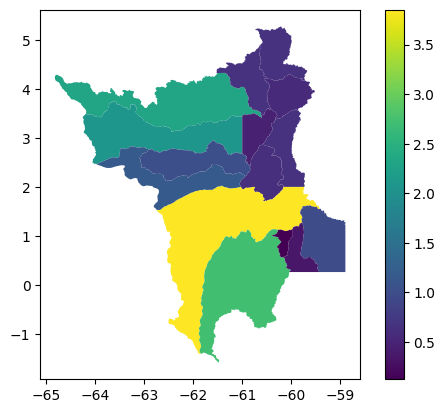

In [ ]:
# TODO: Criar um mapa usando as áreas calculadas



---
# **FIM da aula 001**

---